In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = load_diabetes()
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_y = pd.DataFrame(data.target)

In [2]:
df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [3]:
df_y /= 346
df_y

,0
0,0.436416
1,0.216763
2,0.407514
3,0.595376
4,0.390173
...,...
437,0.514451
438,0.300578
439,0.381503
440,0.635838


In [4]:
X = df_X
y = df_y

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353, 1)
(89, 10) (89, 1)


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 0.024225614191031114
RMSE: 0.15564579721608648


In [8]:
type(y_test)

pandas.core.frame.DataFrame

y_test가 DataFrame이고 y_pred가 ndarray타입이므로, y_pred를 y_test에 concat하고 산점도로 시각화

In [9]:
y_test_pred = y_test.copy()
y_test_pred["y_pred"] = y_pred
y_test_pred

,0,y_pred
287,0.632948,0.403317
211,0.202312,0.518836
72,0.583815,0.387395
321,0.664740,0.842246
73,0.320809,0.357774
...,...,...
255,0.442197,0.332404
90,0.283237,0.228196
57,0.106936,0.235725
391,0.182081,0.157168


In [10]:
y_test_pred.rename(columns={0 : "y_test"}, inplace=True)
y_test_pred

,y_test,y_pred
287,0.632948,0.403317
211,0.202312,0.518836
72,0.583815,0.387395
321,0.664740,0.842246
73,0.320809,0.357774
...,...,...
255,0.442197,0.332404
90,0.283237,0.228196
57,0.106936,0.235725
391,0.182081,0.157168


In [11]:
x = y_test_pred.index
x

Index([287, 211,  72, 321,  73, 418, 367, 354, 281, 148, 429,  78, 126, 113,
       329, 427, 172, 268,  76, 116,   9, 181,  55, 399,  30, 140, 341, 209,
       436, 132, 407,  79,  39, 333, 311, 422,  75, 157, 307, 370,  70, 227,
       284, 402, 199,  82,  77,  33, 358, 395, 411, 131,  11, 386,  15, 104,
       196,   0,  19, 286, 320,  56, 244, 101, 218, 291, 409, 388, 374,  25,
       185, 203, 117,  42, 296, 423, 155, 440, 176, 285,  22,  46,  93, 433,
       255,  90,  57, 391,  24],
      dtype='int64')

<Axes: xlabel='None', ylabel='y_pred'>

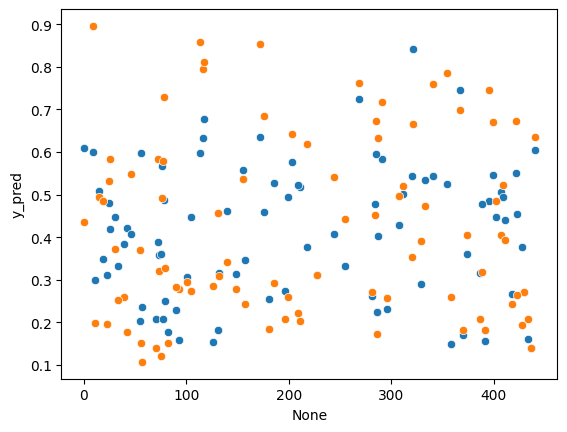

In [12]:
sns.scatterplot(data=y_test_pred, x=x, y="y_pred")
sns.scatterplot(data=y_test_pred, x=x, y="y_test")